<a href="https://colab.research.google.com/github/DeisyData/BIT_IA_Bootcamp/blob/main/perceptron_solve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

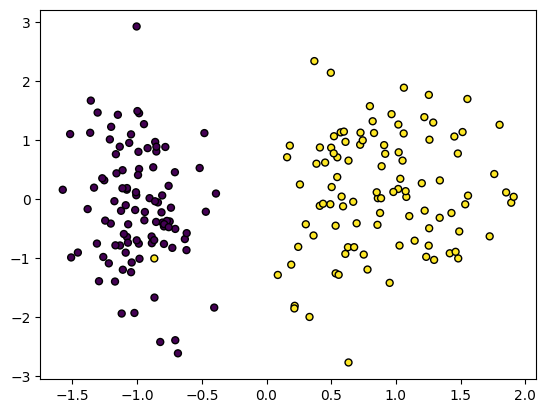

In [16]:
X1, Y1 = make_classification(
    n_samples = 200, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1
) # Se genera un conjunto de datos para clasificación
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k") # Hacemos el gráfico de dispersión

In [17]:
# Guardar los datos generados en un archivo CSV
data_generated = pd.DataFrame(X1, columns=['Feature 1', 'Feature 2'])
data_generated['Label'] = Y1
output_csv_path = 'generated_classification_data.csv'
data_generated.to_csv(output_csv_path, index=False)

output_csv_path

'generated_classification_data.csv'

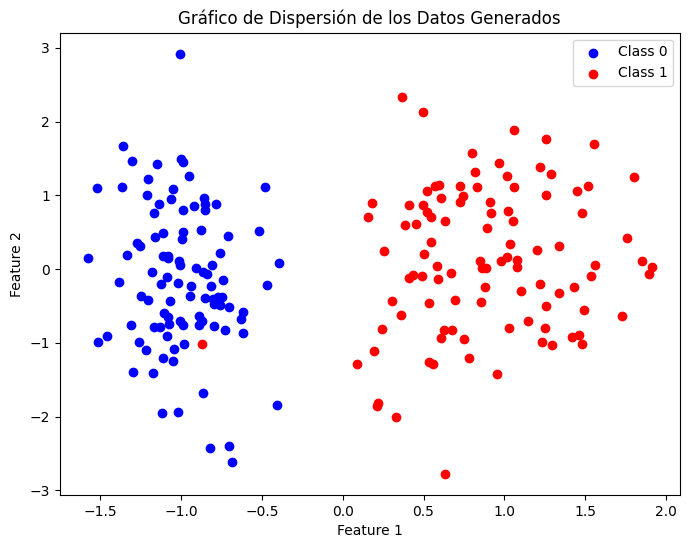

In [18]:
# Graficar los datos cargados para observar la distribución de las clases
plt.figure(figsize=(8, 6))
plt.scatter(data_generated[data_generated['Label'] == 0]['Feature 1'],
            data_generated[data_generated['Label'] == 0]['Feature 2'],
            color='blue', label='Class 0')
plt.scatter(data_generated[data_generated['Label'] == 1]['Feature 1'],
            data_generated[data_generated['Label'] == 1]['Feature 2'],
            color='red', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gráfico de Dispersión de los Datos Generados')
plt.legend()
plt.show()

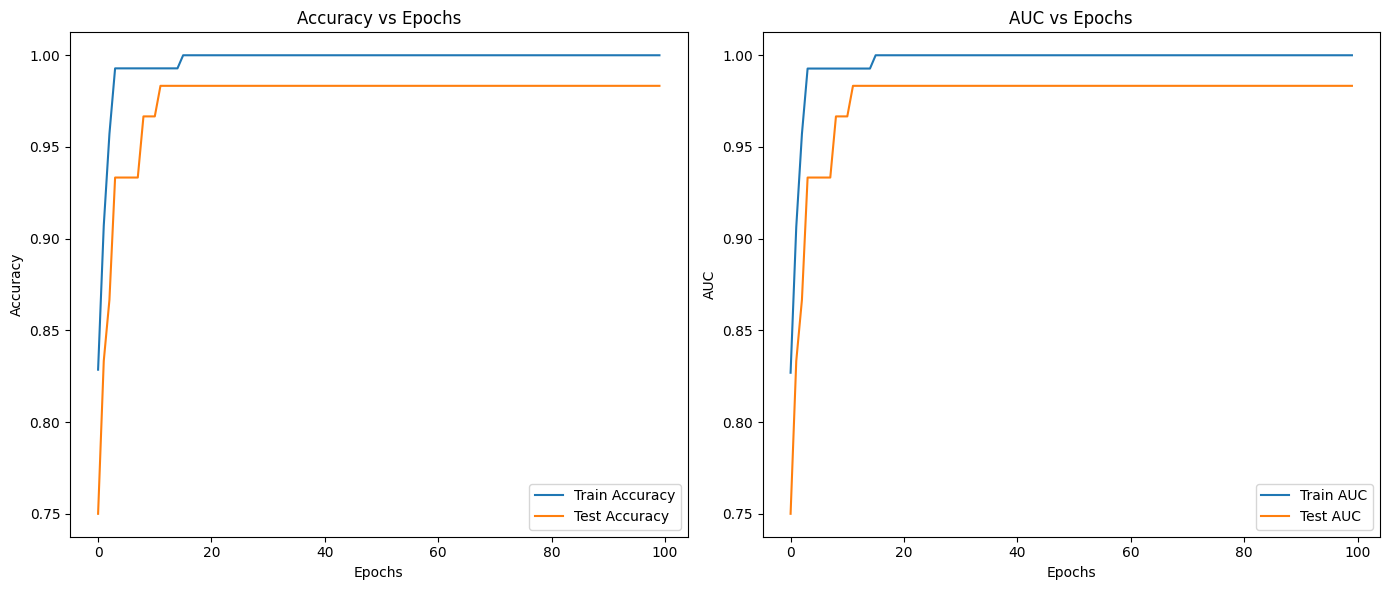

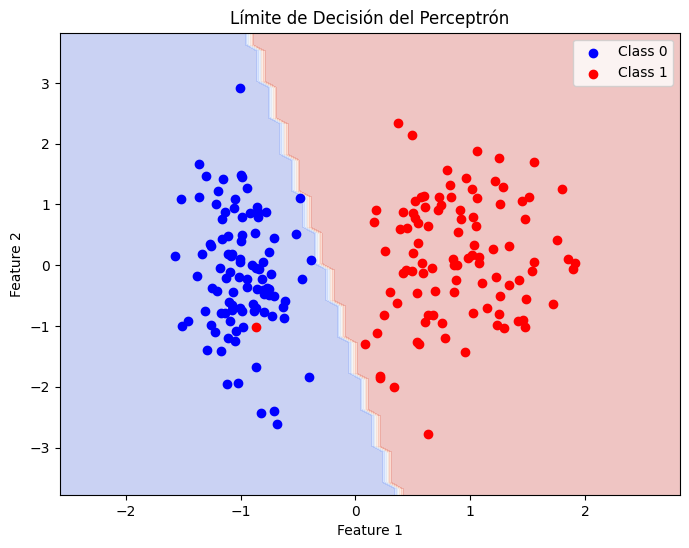

In [19]:
from sklearn.metrics import roc_auc_score

# Convertir los datos en matrices de numpy para facilidad de manipulación
X = data_generated[['Feature 1', 'Feature 2']].values
y = data_generated['Label'].values

# Dividir los datos en entrenamiento y prueba (70% - 30%)
train_size = int(0.7 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Inicializar pesos y otros parámetros del perceptrón
np.random.seed(42)
weights = np.random.rand(2)
bias = np.random.rand(1)[0]
learning_rate = 0.01
epochs = 100

# Listas para almacenar métricas en cada época
train_accuracy_history = []
test_accuracy_history = []
train_auc_history = []
test_auc_history = []

# Función de activación binaria (perceptrón)
def activation(x):
    return 1 if x >= 0 else 0

# Entrenamiento del perceptrón
for epoch in range(epochs):
    # Entrenamiento en cada muestra del conjunto de entrenamiento
    for xi, target in zip(X_train, y_train):
        # Calcular salida del perceptrón
        linear_output = np.dot(xi, weights) + bias
        y_pred = activation(linear_output)

        # Actualización de pesos y bias
        error = target - y_pred
        weights += learning_rate * error * xi
        bias += learning_rate * error

    # Evaluación en el conjunto de entrenamiento
    train_predictions = [activation(np.dot(xi, weights) + bias) for xi in X_train]
    train_accuracy = np.mean(train_predictions == y_train)
    train_auc = roc_auc_score(y_train, train_predictions)

    # Evaluación en el conjunto de prueba
    test_predictions = [activation(np.dot(xi, weights) + bias) for xi in X_test]
    test_accuracy = np.mean(test_predictions == y_test)
    test_auc = roc_auc_score(y_test, test_predictions)

    # Guardar métricas de esta época
    train_accuracy_history.append(train_accuracy)
    test_accuracy_history.append(test_accuracy)
    train_auc_history.append(train_auc)
    test_auc_history.append(test_auc)

# Graficar precisión y AUC en función de las épocas
plt.figure(figsize=(14, 6))

# Gráfica de precisión vs épocas
plt.subplot(1, 2, 1)
plt.plot(range(epochs), train_accuracy_history, label='Train Accuracy')
plt.plot(range(epochs), test_accuracy_history, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()

# Gráfica de AUC vs épocas
plt.subplot(1, 2, 2)
plt.plot(range(epochs), train_auc_history, label='Train AUC')
plt.plot(range(epochs), test_auc_history, label='Test AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.title('AUC vs Epochs')
plt.legend()

plt.tight_layout()
plt.show()

# Crear una malla de puntos para graficar el límite de decisión
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Calcular las predicciones en cada punto de la malla
Z = np.array([activation(np.dot([x, y], weights) + bias) for x, y in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)

# Graficar el límite de decisión
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Límite de Decisión del Perceptrón')
plt.legend()
plt.show()
